# 成長管モデルの可視化

In [ ]:
!pip install git+https://github.com/noshita/growing_tube_model_estimation.git

In [2]:
import numpy as np
import scipy as sp

from scipy.spatial.transform import Rotation as R

import plotly.graph_objects as go

from growing_tube_model_estimation.growing_tube import growing_tube_model

## 成長管モデルでの表面座標の計算
`growing_tube_model`関数を用いる．

In [9]:
?growing_tube_model

Signature:
growing_tube_model(
    s,
    phi,
    E,
    C,
    T,
    r0=1,
    p0=array([0., 0., 0.]),
    R0=array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]]),
)
Docstring:
Growing tube model
Parameters
s: real, np.ndarray
    growth stage
phi: real, np.ndarray
    parameter of generating curve
E: real, np.ndarray, or callable
    growth rate of tube
C: real, np.ndarray, or callable
    Standardized curvature
T: real, np.ndarray, or callable
    Standardized torsion
r0: float
    initial tube thickness
p0: 1D array-like
    initial position
R0: 2D array-like
    initial orientation

Returns
UMat: np.ndarray
    Coordinate values
File:      ~/working_dir/growing_tube_model_estimation/growing_tube_model_estimation/growing_tube/_growing_tube_model.py
Type:      function

成長段階`s`と殻口パラメータ`phi`の[メッシュグリッド](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)を用意し，殻表面座標を計算する．

メッシュグリッドに基づいた計算をすることで形状`(3, len(phi), len(s))`の`UMat`を得る．

In [11]:
s = np.linspace(0,60,200)
phi = np.linspace(0,2*np.pi,180)
s_mesh, phi_mesh = np.meshgrid(s, phi)

UMat = growing_tube_model(
    s_mesh, phi_mesh, 
    0.02, # E 
    0.4, # C
    0.06, # T
    p0=np.array([0,0,0]), # 初期位置
    R0=R.from_rotvec(np.pi * np.array([1,0,0])).as_matrix() # 初期向き
)

[Plotly](https://plotly.com/)の[Surface](https://plotly.com/python-api-reference/generated/plotly.graph_objects.Surface.html)関数で可視化する（例：[ 3D Surface Plots in Python ](https://plotly.com/python/3d-surface-plots/)）．

そのため`UMat`を可視化用に`x`, `y`, `z`座標に格納する．

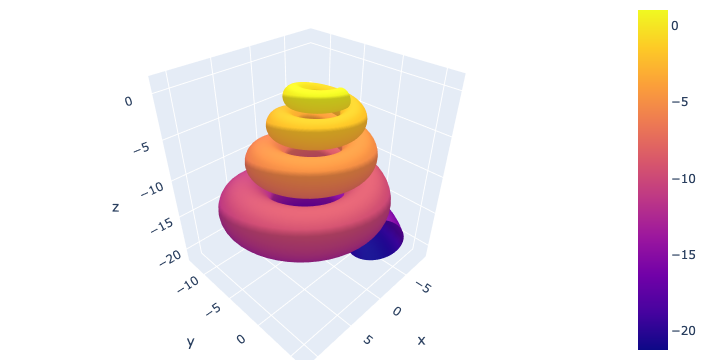

In [12]:
x, y, z = UMat
fig = go.Figure(data=[
    go.Surface(x=x, y=y, z=z)
])
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene_aspectmode="data"
)
fig.show()